### Safwan Elmadani ECE 523
##### Linear and Quadratic Classifiers:

In [1]:
import numpy as np
import plotly.express as px
import pandas as pd 
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
import math 
import scipy as sp
%matplotlib notebook

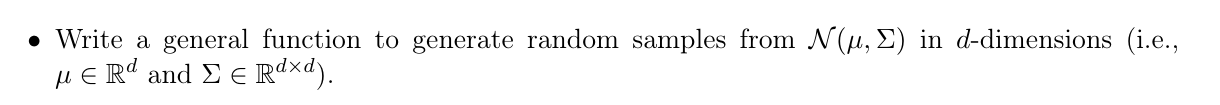

In [2]:
def data_gen_multivariate_gaussian(mean, cov, sample_size):
    # mean: mean of the d-dimensional distribution
    # cov: covariance matrix and must be PSD matrix. 2 dimensions array (d,d)
    # sample_size: the number of samples
    # this function returns a random vector of d-dimensions
    x = np.random.multivariate_normal(mean,cov, sample_size)
    return x

Testing the function by generating random samples from a normal distribution in 2-dimentsions

In [3]:
x = data_gen_multivariate_gaussian([-1,-1], [[1, -0.25],[-0.25, 1]], 500)
y = data_gen_multivariate_gaussian([1,1], [[1, -0.25],[-0.25, 1]], 500)
x.shape 

(500, 2)

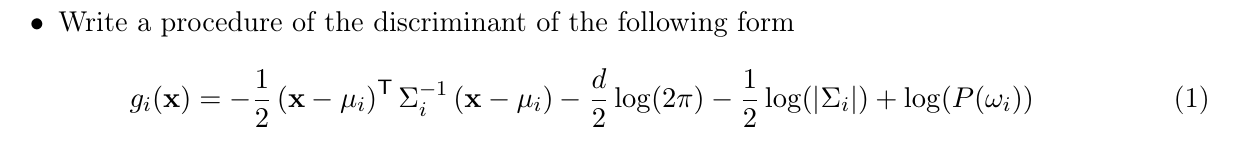

In [4]:
def discriminant(x, mu_i, cov_i, prior_prob):
    x_minus_mu = x - mu_i 
    inv_sigma = np.linalg.inv(cov_i)
    temp= np.dot(x_minus_mu.T, inv_sigma)
    mahalanobis_distance= np.dot(temp, x_minus_mu)
    d = len(x)
    g_i = - (1/2) * mahalanobis_distance - (d/2) * math.log(2 * math.pi) \
            - (1/2) * math.log(np.linalg.det(cov_i)) \
            + prior_prob
    
    return g_i

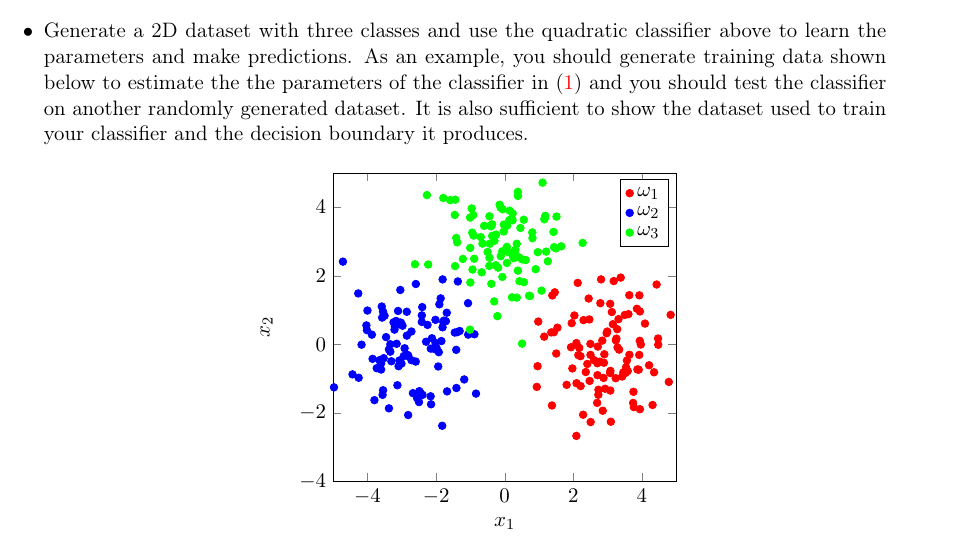

### Generating 2D training dataset with 3 classes

In [5]:
mu_1=[-3,0]
mu_2 = [3,0]
mu_3 = [0,3]
cov_1 = [[1, -0.25],[-0.25, 1]]
cov_2 = [[1, -0.25],[-0.25, 1]]
cov_3 = [[1, -0.25],[-0.25, 1]]
num_samples= 500

w1 = data_gen_multivariate_gaussian(mu_1, cov_1, num_samples)
w2 = data_gen_multivariate_gaussian(mu_2, cov_2, num_samples)
w3 = data_gen_multivariate_gaussian(mu_3, cov_3, num_samples)
#prior probability is the same for each class
prior_p=500/1500
#concatenate whole samples in one array 
train_dataset=np.concatenate([w1,w2,w3])

<IPython.core.display.Javascript object>


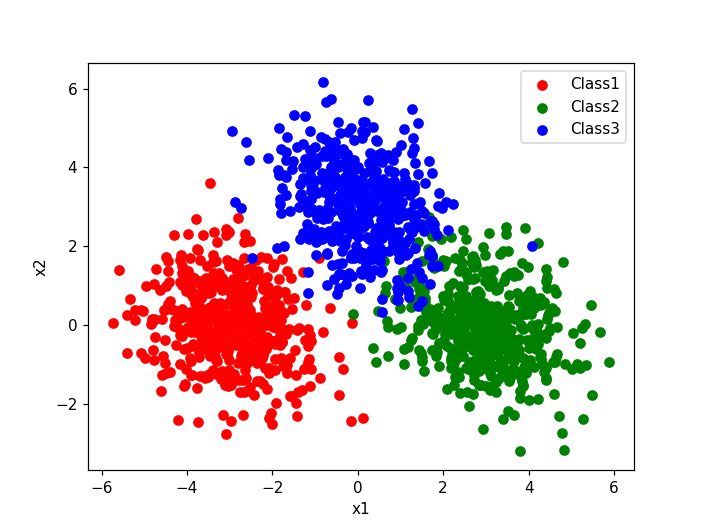

In [6]:
figure1 = plt.figure()
plt.scatter(w1[:,0], w1[:,1], color='r', label='Class1')
plt.scatter(w2[:,0], w2[:,1], color='g', label='Class2')
plt.scatter(w3[:,0], w3[:,1], color='b', label='Class3')
# plt.rcParams['figure.figsize'] = [20, 20]
plt.xlabel('x1') 
plt.ylabel('x2')
plt.legend()
# plt.grid()
plt.show()

### Ploting the generated dataset

### Using the training data to estimate the parameters of the classifier

In [7]:
resutls =[]
belong_to = ''
for x in train_dataset:
    g_1 = discriminant(x,mu_1, cov_1, prior_p)
    g_2 = discriminant(x,mu_2, cov_2, prior_p)
    g_3 = discriminant(x,mu_3, cov_3, prior_p)
    #finding the index of the maximum value
    class_index= [g_1, g_2, g_3].index(max([g_1, g_2, g_3])) 
    if class_index == 0:
        belong_to = 'class1'
    if class_index == 1:
        belong_to = 'class2'
    if class_index == 2:
        belong_to = 'class3'
    resutls.append([g_1, g_2, g_3, belong_to])


### Classifing the traning data afer using the discriminat function

In [8]:
#elements in class 1
train_dataset = train_dataset.tolist()
w1_new = []
w2_new = []
w3_new = []

for i in resutls:
    if i[-1] == 'class1':
        w1_new.append(train_dataset[resutls.index(i)])
    if i[-1] == 'class2':
        w2_new.append(train_dataset[resutls.index(i)])
    if i[-1] == 'class3':
        w3_new.append(train_dataset[resutls.index(i)])
        

### comparing classifier parameters
__Original parameters:__ <br>
mu_1=[-3,0] <br>
mu_2 = [3,0] <br>
mu_3 = [0,3] <br>
cov_1 = [[1, -0.25],[-0.25, 1]] <br>
cov_2 = [[1, -0.25],[-0.25, 1]] <br>
cov_3 = [[1, -0.25],[-0.25, 1]] <br>


In [9]:
w1_new_=np.array(w1_new)
mu_1new=np.mean(w1_new_, axis=0)
print( 'estimated mean 1:', mu_1new)
print('estimated cov. 1: \n',np.cov(w1_new_.T))

estimated mean 1: [-2.96926469  0.04866827]
estimated cov. 1: 
 [[ 0.95113247 -0.19430101]
 [-0.19430101  1.01851877]]


In [10]:
w2_new_=np.array(w2_new)
mu_2new=np.mean(w2_new_, axis=0)
print( 'estimated mean 2:', mu_2new)
print('estimated cov. 2: \n',np.cov(w2_new_.T))

estimated mean 2: [ 2.9725136 -0.0280828]
estimated cov. 2: 
 [[ 0.99857554 -0.18850639]
 [-0.18850639  0.93203163]]


In [11]:
w3_new_=np.array(w3_new)
mu_3new=np.mean(w3_new_, axis=0)
print( 'estimated mean 3:', mu_3new)
print('estimated cov. 3: \n',np.cov(w3_new_.T))

estimated mean 3: [0.0589787  3.03773288]
estimated cov. 3: 
 [[ 0.85716762 -0.21489694]
 [-0.21489694  1.00718631]]


### Ploting the classified dataset to show the decision boundary

<IPython.core.display.Javascript object>


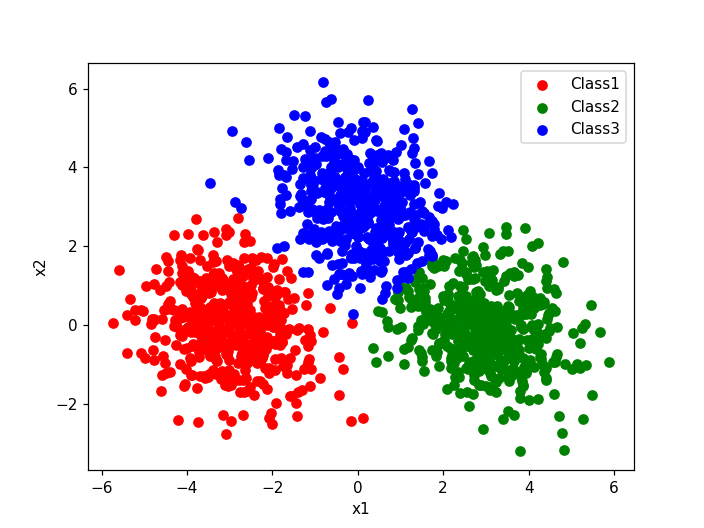

In [12]:
figure2 = plt.figure()
plt.scatter(w1_new_[:,0], w1_new_[:,1], color='r', label='Class1')
plt.scatter(w2_new_[:,0], w2_new_[:,1], color='g', label='Class2')
plt.scatter(w3_new_[:,0], w3_new_[:,1], color='b', label='Class3')
# plt.rcParams['figure.figsize'] = [20, 20]
plt.xlabel('x1') 
plt.ylabel('x2')
plt.legend()
# plt.grid()
plt.show()

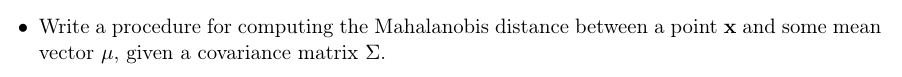

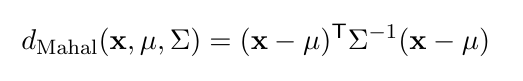

In [13]:
def mahalanobi_dist(x, mu, cov):
    x_minus_mu = x - mu 
    inv_sigma = np.linalg.inv(cov)
    temp= np.dot(x_minus_mu.T, inv_sigma)
    mahalanobis_distance= np.dot(temp, x_minus_mu)
    return mahalanobis_distance

__Compating mahalanobis_dist function to the scipy implementation__
__https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.mahalanobis.html__

In [14]:
some_x = np.array([2,0,0])
some_mu = np.array([0,1,0])
some_cov =np.array([[ 1.5, -0.5, -0.5],
                    [-0.5,  1.5, -0.5],
                    [-0.5, -0.5,  1.5]])
print ('my function: ', mahalanobi_dist(some_x, some_mu, some_cov) **0.5)
print ('scipy function: ', sp.spatial.distance.mahalanobis(some_x, some_mu, \
                                            np.linalg.inv(some_cov)))


my function:  1.7320508075688772
scipy function:  1.7320508075688772


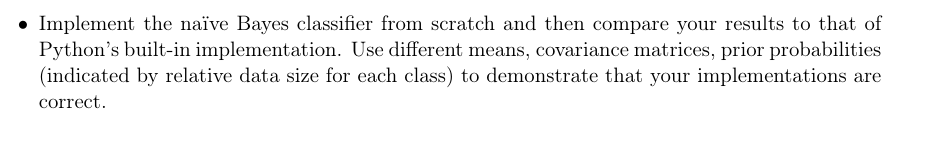

In [32]:
def cal_pdf(x_i, mu_w, sigma_w):
    """
    
    This function is used to calculate the pdf of normal distribution
    
    """
    e_power = - (1/(2 * sigma_w**2)) * (x_i - mu_w)**2
    pdf = (1/ (math.sqrt(2 * math.pi * sigma_w**2 ))) * math.exp(e_power)
    return pdf

In [33]:
#The cov matrix is not diagonal but we assume it is.
def Gaussian_naive_bayes(x, mu, cov, prior_p):
    # the summation is with respect the number of features in a vector.
    d=len(x)
    sigmas = np.diagonal(cov)
    liklihood = []
    for i in range(len(x)):
        g_pdf = cal_pdf(x[i], mu[i], sigmas[i])
        liklihood.append(np.log(g_pdf))
#     print (liklihood)
    score = np.log(prior_p) + np.sum(np.array(liklihood))    
    return score

### I will be using the same dataset to test Naive Bayes classifier

In [34]:
prior_p=500/1500
train_dataset=np.concatenate([w1,w2,w3])
w1.shape

(500, 2)

In [35]:
w1_l = w1.tolist()
w2_l = w2.tolist()
w3_l = w3.tolist()
datalist = []
for i in range(len(w1_l)):
    w1_l[i].append(1)
    w2_l[i].append(2)
    w3_l[i].append(3)

datalist.extend(w1_l)
datalist.extend(w2_l)
datalist.extend(w3_l)

In [36]:
bayes_results = []
for j in train_dataset:
    belong_to = ''
    s1 = Gaussian_naive_bayes(j, mu_1, cov_1, prior_p)
    s2 = Gaussian_naive_bayes(j, mu_2, cov_2, prior_p)
    s3 = Gaussian_naive_bayes(j, mu_3, cov_3, prior_p)
    #finding the index of the maximum value
    class_index= [s1, s2, s3].index(max([s1, s2, s3])) 
    if class_index == 0:
        belong_to = 'class1'
    if class_index == 1:
        belong_to = 'class2'
    if class_index == 2:
        belong_to = 'class3'
    bayes_results.append([s1, s2, s3, belong_to])

In [37]:
w1b = []
w2b = []
w3b = []
train_dataset = train_dataset.tolist()
for i in bayes_results:
    
    if i[-1] == 'class1':
        w1b.append(train_dataset[bayes_results.index(i)])
    if i[-1] == 'class2':
        w2b.append(train_dataset[bayes_results.index(i)])
    if i[-1] == 'class3':
        w3b.append(train_dataset[bayes_results.index(i)])
        

### comparing classifier parameters
__Original parameters:__ <br>
mu_1=[-3,0] <br>
mu_2 = [3,0] <br>
mu_3 = [0,3] <br>
cov_1 = [[1, -0.25],[-0.25, 1]] <br>
cov_2 = [[1, -0.25],[-0.25, 1]] <br>
cov_3 = [[1, -0.25],[-0.25, 1]] <br>


In [38]:
w1b=np.array(w1b)
print( 'estimated mean 1:', np.mean(w1b, axis=0))
print('estimated cov. 1: \n',np.cov(w1b.T))

estimated mean 1: [-2.97547076  0.05349335]
estimated cov. 1: 
 [[ 0.93378841 -0.17971947]
 [-0.17971947  1.00892735]]


In [77]:
w2b=np.array(w2b)
print( 'estimated mean 2:', np.mean(w2b, axis=0))
print('estimated cov. 2: \n',np.cov(w2b.T))

estimated mean 2: [ 2.96677687 -0.03276315]
estimated cov. 2: 
 [[ 1.01291859 -0.17478193]
 [-0.17478193  0.94103966]]


In [78]:
w3b=np.array(w3b)
print( 'estimated mean 3:', np.mean(w3b, axis=0))
print('estimated cov. 3: \n',np.cov(w3b.T))

estimated mean 3: [0.0589787  3.03773288]
estimated cov. 3: 
 [[ 0.85716762 -0.21489694]
 [-0.21489694  1.00718631]]


### Ploting the classified dataset to show the decision boundary

<IPython.core.display.Javascript object>


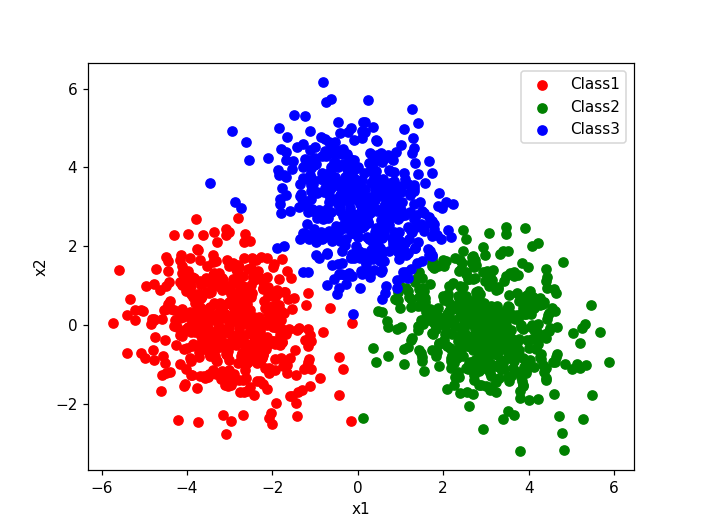

In [41]:
figure3 = plt.figure()
plt.scatter(w1b[:,0], w1b[:,1], color='r', label='Class1')
plt.scatter(w2b[:,0], w2b[:,1], color='g', label='Class2')
plt.scatter(w3b[:,0], w3b[:,1], color='b', label='Class3')
# plt.rcParams['figure.figsize'] = [20, 20]
plt.xlabel('x1') 
plt.ylabel('x2')
plt.legend()
# plt.grid()
plt.show()

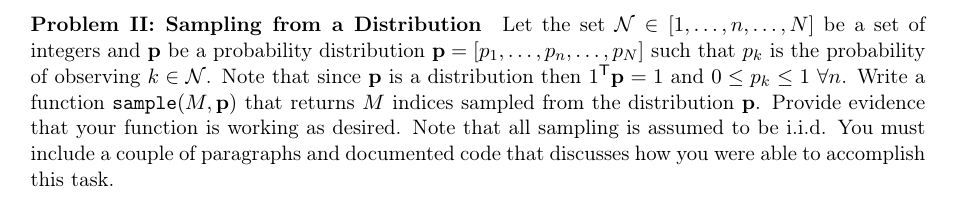

The approach that was used to solve this problem was to first find the cdf of the probability distribution, then draw a sample from uniform distribution. Then using the cdf we find the range in which the sample lies. We repeat this process until we gather M samples.

In [42]:
def sample(M , p):
    """
    This function return a list of M indices sampled from the distribution p
    
    M: sample size
    p: distribution to be used in sampling
    """
    temp = 0.0
    cdf_p = [] #list to hold the cdf ranges 
    index_list = [] #list of indices to be returned 
    for i in p:
        cdf_p.append(temp + i)
        temp = cdf_p[-1]
        
    for j in range(M):
        #for every iteration
        #draw a sample from a uniform distribution
        sample_uniform = np.random.uniform(0.0,1.0,1)
        temp = 0.0
        #Now we need to find in what range the sample lies with respect to the cdf range list
        for k in range(len(cdf_p)):
            if (temp <= sample_uniform) and (sample_uniform <= cdf_p[k]):
                index_list.append(k)
            temp = cdf_p[k]
    
    return index_list

In [75]:
#tesitng the function 
M = 1000
N = 4
r = np.random.uniform(0.0,1.0,N)
p = r/r.sum()
print ("Original distribution p: ", p)

Original distribution p:  [0.02559924 0.13567054 0.46809595 0.37063427]


In [76]:
est_dist = []
list_indices = sample(M, p)
for i in range(len(p)):
    est_dist.append(list_indices.count(i))
estimated_p = np.array(est_dist)/M
print('Estimated distribution p\': ', estimated_p)

Estimated distribution p':  [0.021 0.138 0.469 0.372]
